In [2]:
# 패키지 불러오기

import pandas             as pd    # 데이터 읽어오기/저장하기, 데이터 핸들링
import numpy              as np
import seaborn            as sns   # 데이터 시각화(고수준)
import matplotlib.pyplot  as plt   # 데이터 시각화(저수준)
import scipy.stats        as stats # 통계, 수학

In [3]:
diamonds = sns.load_dataset("diamonds")

In [4]:
# HDD에 있는 pickle 데이터를 메모리(RAM)에 올리는 기능
data = pd.read_pickle("d:/novelis/ds2023/diamonds_230830.pickle")

In [5]:
# (2) 다름(퍼짐, 산포) : 데이터 분석의 핵심
# 범위, 사분위 범위, 표준편차, 중위수절대편차

In [6]:
# i. 범위(Range) : 최대값(Max) - 최소값(Min)
# data.수치형 데이터.max() - data.수치형데이터.min() 
diamonds.carat.max() - diamonds.carat.min()

4.81

In [7]:
# ii. 사분위범위(IQR: Inter Quartile Range) : Q3 - Q1 
# scipy.stats.iqr(data.수치형데이터)
stats.iqr(data.carat)

0.64

In [8]:
# iii. 표준편차(SD: Standard Deviation)
# 중심(대표값)과 얼마나 다를까? 
# 평균과 얼마나 다를까? 
# 참고로 표준편차는 이상치의 영향을 많이 받기 떄문에 위험한 값

# data.수치형데이터.std()
diamonds.carat.std()

0.4740112444054184

In [9]:
# iv. 중위수절대편차(MAD: Median Absolute Deviation)
# 중심(대표값)과 얼마나 다를까?
# 중위수와 얼마나 다를까?

#scipy.stats.median_abs_deviation(data.수치형데이터)
stats.median_abs_deviation(diamonds.carat)

0.32000000000000006

In [10]:
# (3) 분포의 모양: 왜도, 첨도 
# i.왜도(Skewness): 기울어진 정도, 대칭 여부 파악
# scipy.stats.skew(data.수치데이터)
stats.skew(diamonds.carat)

1.1166148681277797

In [11]:
# ii.첨도(Kurtosis): 중심이 얼마나 뾰족한가? 중심에 얼마나 몰려 있는가? 
# scipy.stats.kurtosis(data.수치형데이터)
stats.kurtosis(diamonds.carat)

1.2564076184374766

In [12]:
# data.수치형데이터.describe()
diamonds.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [13]:
# count : 데이터의 개수 : n

# 참고 : 데이터의 개수 
# N : 모집단(Population)의 데이터의 개수
# n : 표본(sample)의 데이터의 개수

# 모집단 : 관심 있는 대상의 전체

# 25% : Q1 : first Quartile : 제 1 사분위수
# 50% : Median : Q2
# 75% : Q3 : third Quartile : 제 3 사분위수

In [14]:
# scipy.stats.descrieb(data.수치형데이터)
stats.describe(diamonds.carat)

DescribeResult(nobs=53940, minmax=(0.2, 5.01), mean=0.7979397478680014, variance=0.22468665982277336, skewness=1.1166148681277797, kurtosis=1.2564076184374766)

In [15]:
# variance : 분산, 표준 편차의 제곱 
# 평균과 얼마나 다를까를 알려줌, 단위 문제가 있음

### 3. 범주형 데이터의 분석: 2개의 열
- 표 = 교차표
- 데이터 시각화 : 누적막대그래프

In [16]:
# 범주형 데이터 : 1개 : X : 독립변수, Feature 
# 범주형 데이터 : 1개 : Y : 종속변수, Label or Target

In [17]:
# 범주형 데이터 : cut   : X
# 범주형 데이터 : color : Y 

In [18]:
# 3.1 표 = 교차표(Cross Table)
# 빈도, 전체 백분율, 행 백분율, 열 백분율

In [19]:
# (1) 빈도(Frequency)
# pd.crosstab(index = data.범주형데이터(X), 
#           columns = data.범주형데이터(Y/),
#           margins = True)

In [20]:
pd.crosstab(index = diamonds.cut,
           columns = diamonds.color,
           margins = True)

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896,21551
Premium,1603,2337,2331,2924,2360,1428,808,13791
Very Good,1513,2400,2164,2299,1824,1204,678,12082
Good,662,933,909,871,702,522,307,4906
Fair,163,224,312,314,303,175,119,1610
All,6775,9797,9542,11292,8304,5422,2808,53940


In [21]:
# (2) 전체 백분율 : (빈도/전체 합계(53940)) * 100
# pd.crosstab(index = data.범주형데이터(X), 
#           columns = data.범주형데이터(Y/),
#           margins = True, 
#           normalize = True)*100

In [22]:
pd.crosstab(index    = diamonds.cut,
           columns   = diamonds.color,
           margins   = True,
           normalize = True)*100

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,5.253986,7.235818,7.093066,9.054505,5.774935,3.880237,1.661105,39.953652
Premium,2.971821,4.332592,4.321468,5.420838,4.375232,2.647386,1.497961,25.567297
Very Good,2.804968,4.449388,4.011865,4.262143,3.381535,2.232110,1.256952,22.398962
Good,1.227290,1.729700,1.685206,1.614757,1.301446,0.967742,0.569151,9.095291
Fair,0.302188,0.415276,0.578420,0.582128,0.561735,0.324435,0.220615,2.984798
All,12.560252,18.162773,17.690026,20.934372,15.394883,10.051910,5.205784,100.000000


In [23]:
# Ideal & G : 9.1% 
# Ideal & F : 7.1%

# 질문 : 두 백분율의 차이는 얼마인가요?
# 2%p 차이가 나요
# %p: Percent Point : 백분율과 백분율의 차이 

In [24]:
# (3) 행 백분율 : (빈도/각 행의 합계(53940)) * 100
# pd.crosstab(index = data.범주형데이터(X), 
#           columns = data.범주형데이터(Y/),
#           margins = True, 
#           normalize = "index")*100

In [25]:
pd.crosstab(index    = diamonds.cut,
           columns   = diamonds.color,
           margins   = True,
           normalize = "index")*100

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,13.150202,18.110529,17.753237,22.662521,14.454086,9.711846,4.157580
Premium,11.623523,16.945834,16.902328,21.202233,17.112610,10.354579,5.858893
Very Good,12.522761,19.864261,17.910942,19.028307,15.096838,9.965238,5.611654
Good,13.493681,19.017530,18.528333,17.753771,14.309009,10.640033,6.257644
Fair,10.124224,13.913043,19.378882,19.503106,18.819876,10.869565,7.391304
All,12.560252,18.162773,17.690026,20.934372,15.394883,10.051910,5.205784


In [26]:
# (3) 열 백분율 : (빈도/각 열의 합계(53940)) * 100
# pd.crosstab(index = data.범주형데이터(X), 
#           columns = data.범주형데이터(Y/),
#           margins = True, 
#           normalize = "columns")*100

In [27]:
pd.crosstab(index    = diamonds.cut,
           columns   = diamonds.color,
           margins   = True,
           normalize = "columns")*100

color,D,E,F,G,H,I,J,All
cut,,,,,,,,
Ideal,41.830258,39.838726,40.096416,43.251860,37.512042,38.601992,31.908832,39.953652
Premium,23.660517,23.854241,24.428841,25.894439,28.420039,26.337145,28.774929,25.567297
Very Good,22.332103,24.497295,22.678684,20.359547,21.965318,22.205828,24.145299,22.398962
Good,9.771218,9.523323,9.526305,7.713425,8.453757,9.627444,10.933048,9.095291
Fair,2.405904,2.286414,3.269755,2.780730,3.648844,3.227591,4.237892,2.984798


In [28]:
# (2) 데이터 시각화: 누적막대그래프
# result = 행백분율의 결과 
# result.plot.bar(stacked = False)
# plt.legend(bbox_to_anchor = (1,1))
# plt.show()

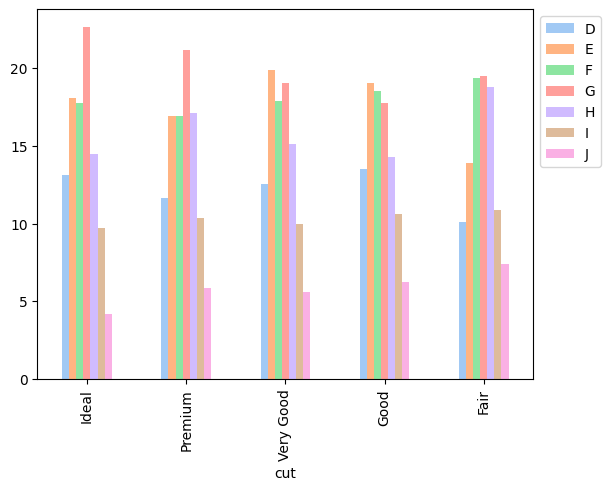

In [39]:
result = pd.crosstab(index    = diamonds.cut,
                     columns   = diamonds.color,
                     normalize = "index")*100

result.plot.bar(stacked = False)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

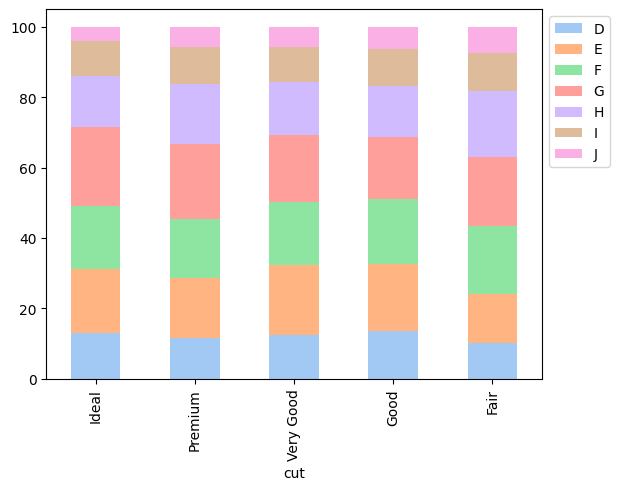

In [33]:
result = pd.crosstab(index    = diamonds.cut,
                     columns   = diamonds.color,
                     normalize = "index")*100

result.plot.bar(stacked = True)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

### 4. 범주별 수치형 데이터의 분석: 2개의 열
- 범주별 데이터 시각화
- 범주별 기술통계량

In [37]:
# 범주형 데이터 : 1개 : X : 독립변수, Feature          : cut
# 수치형 데이터 : 1개 : Y : 종속변수, Label or Target  : carat

In [35]:
# 4.1 범주별 데이터 시각화
# 히스토그램, 상자그림, 바이올린

In [36]:
# (1) 범주별 히스토그램 
# seaborn.histplot(data = , x = 수치형데이터, hue = 범주형데이터)
# plt.show()

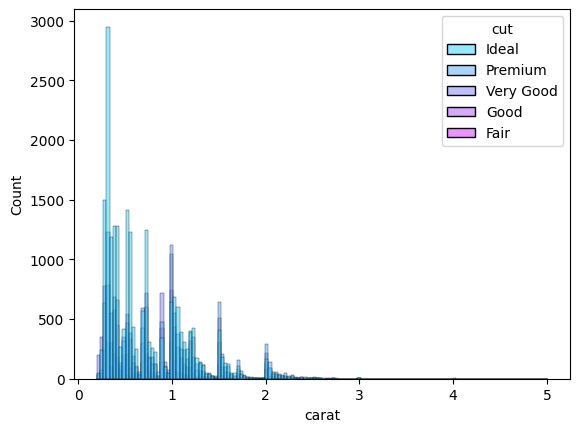

In [40]:
sns.histplot(data = diamonds,
             x = "carat",
             hue = "cut",
             palette="cool")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


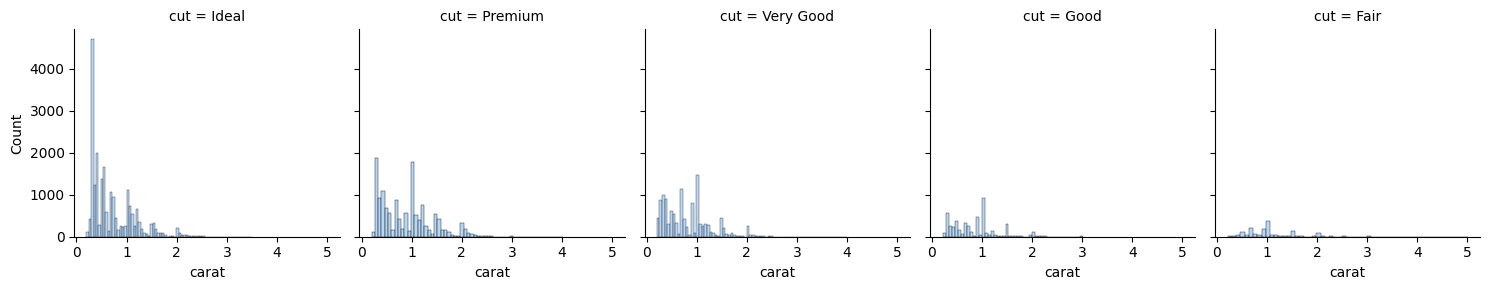

In [44]:
# seaborn.Facet(data. col = "범주형데이터")
g = sns.FacetGrid(diamonds, col = "cut")

# g.map(sns.scatterplot. "수치형데이터")
g.map(sns.histplot, "carat")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


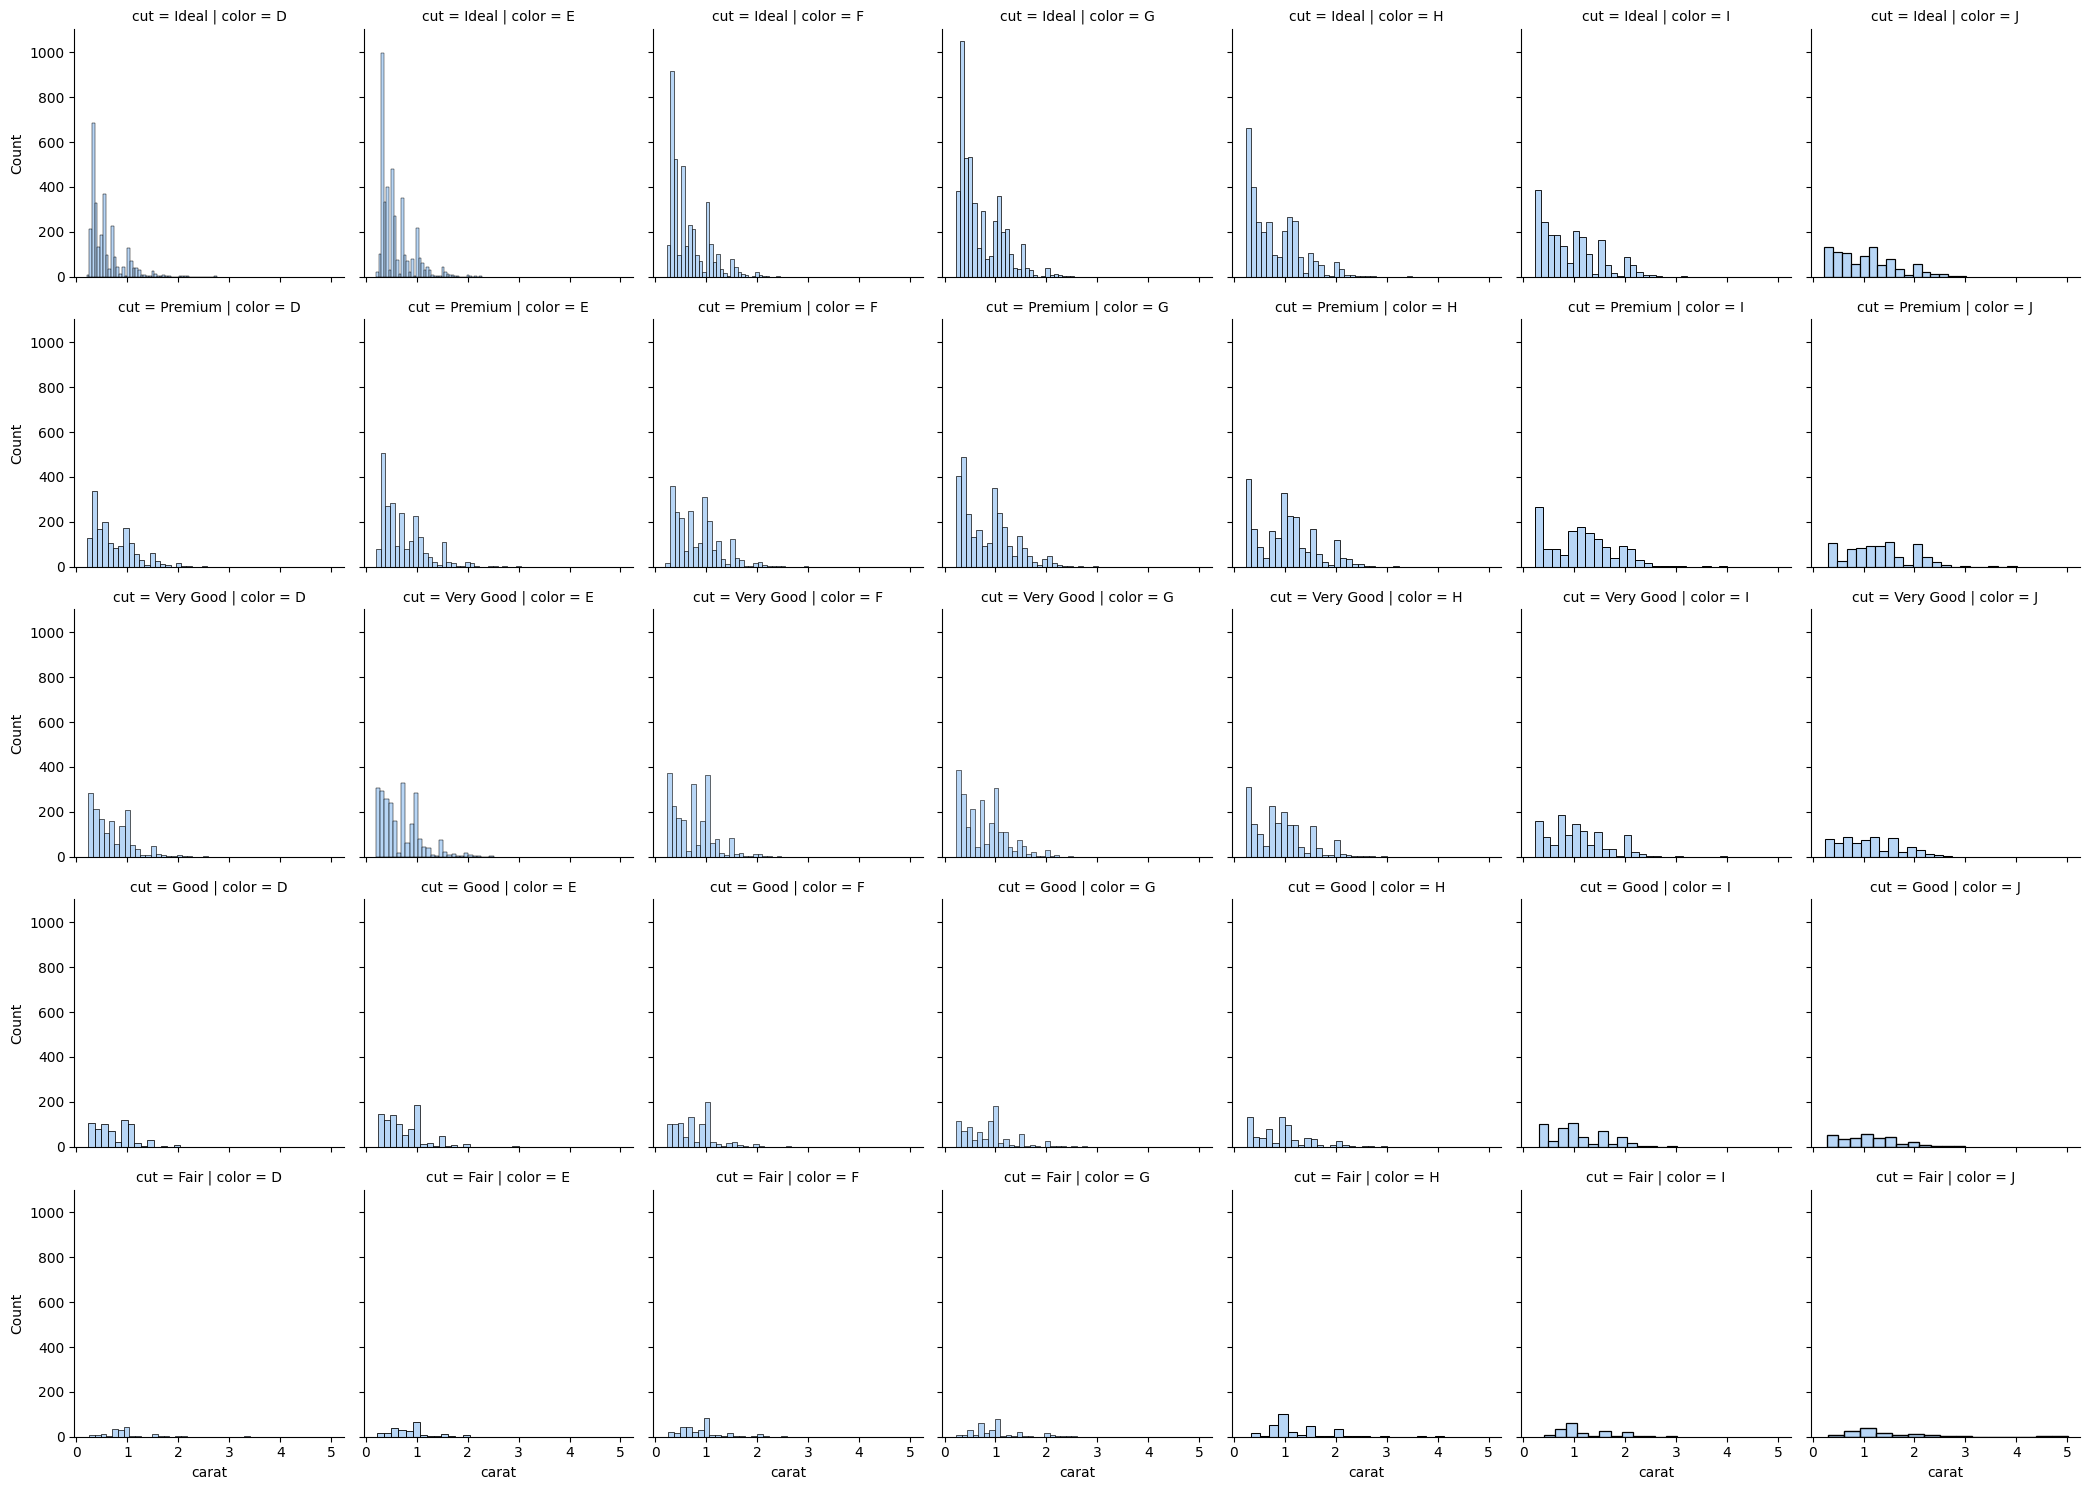

In [45]:
# seaborn.Facet(data. col = "범주형데이터")
g = sns.FacetGrid(diamonds, row = "cut", col = "color")

# g.map(sns.scatterplot. "수치형데이터")
g.map(sns.histplot, "carat")
plt.show()

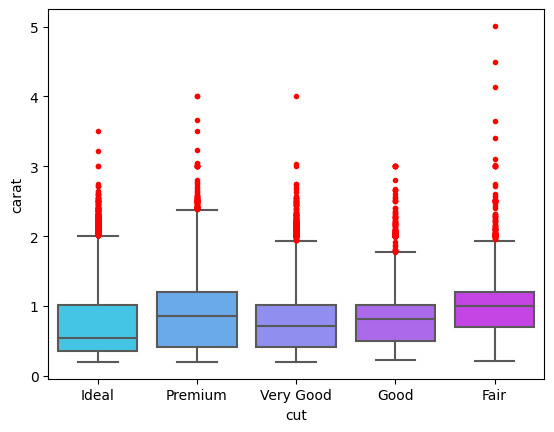

In [51]:
# (2) 범주별 상자그림
# seaborn.boxplot(data = , y = "수치형데이터", x = "범주형데이터")
# plt.show()


flierprops = dict(marker ="o",
                  markerfacecolor = "r",
                  markersize = 3,
                  linestyle = "none",
                  markeredgecolor = "r")  # 이상치에 적용할 스타일


sns.boxplot(data = diamonds, y = "carat", x = "cut",
            palette = "cool",
            flierprops = flierprops)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


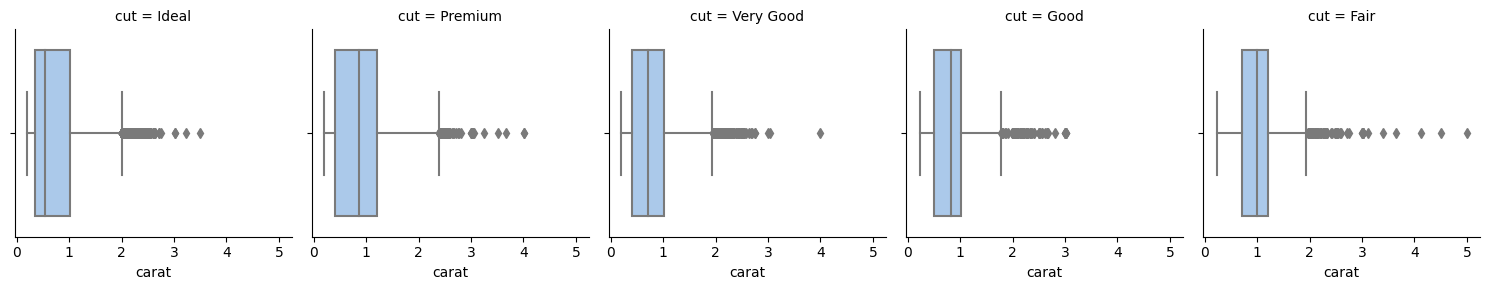

In [52]:
g = sns.FacetGrid(diamonds, col = "cut")
g.map(sns.boxplot, "carat")

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


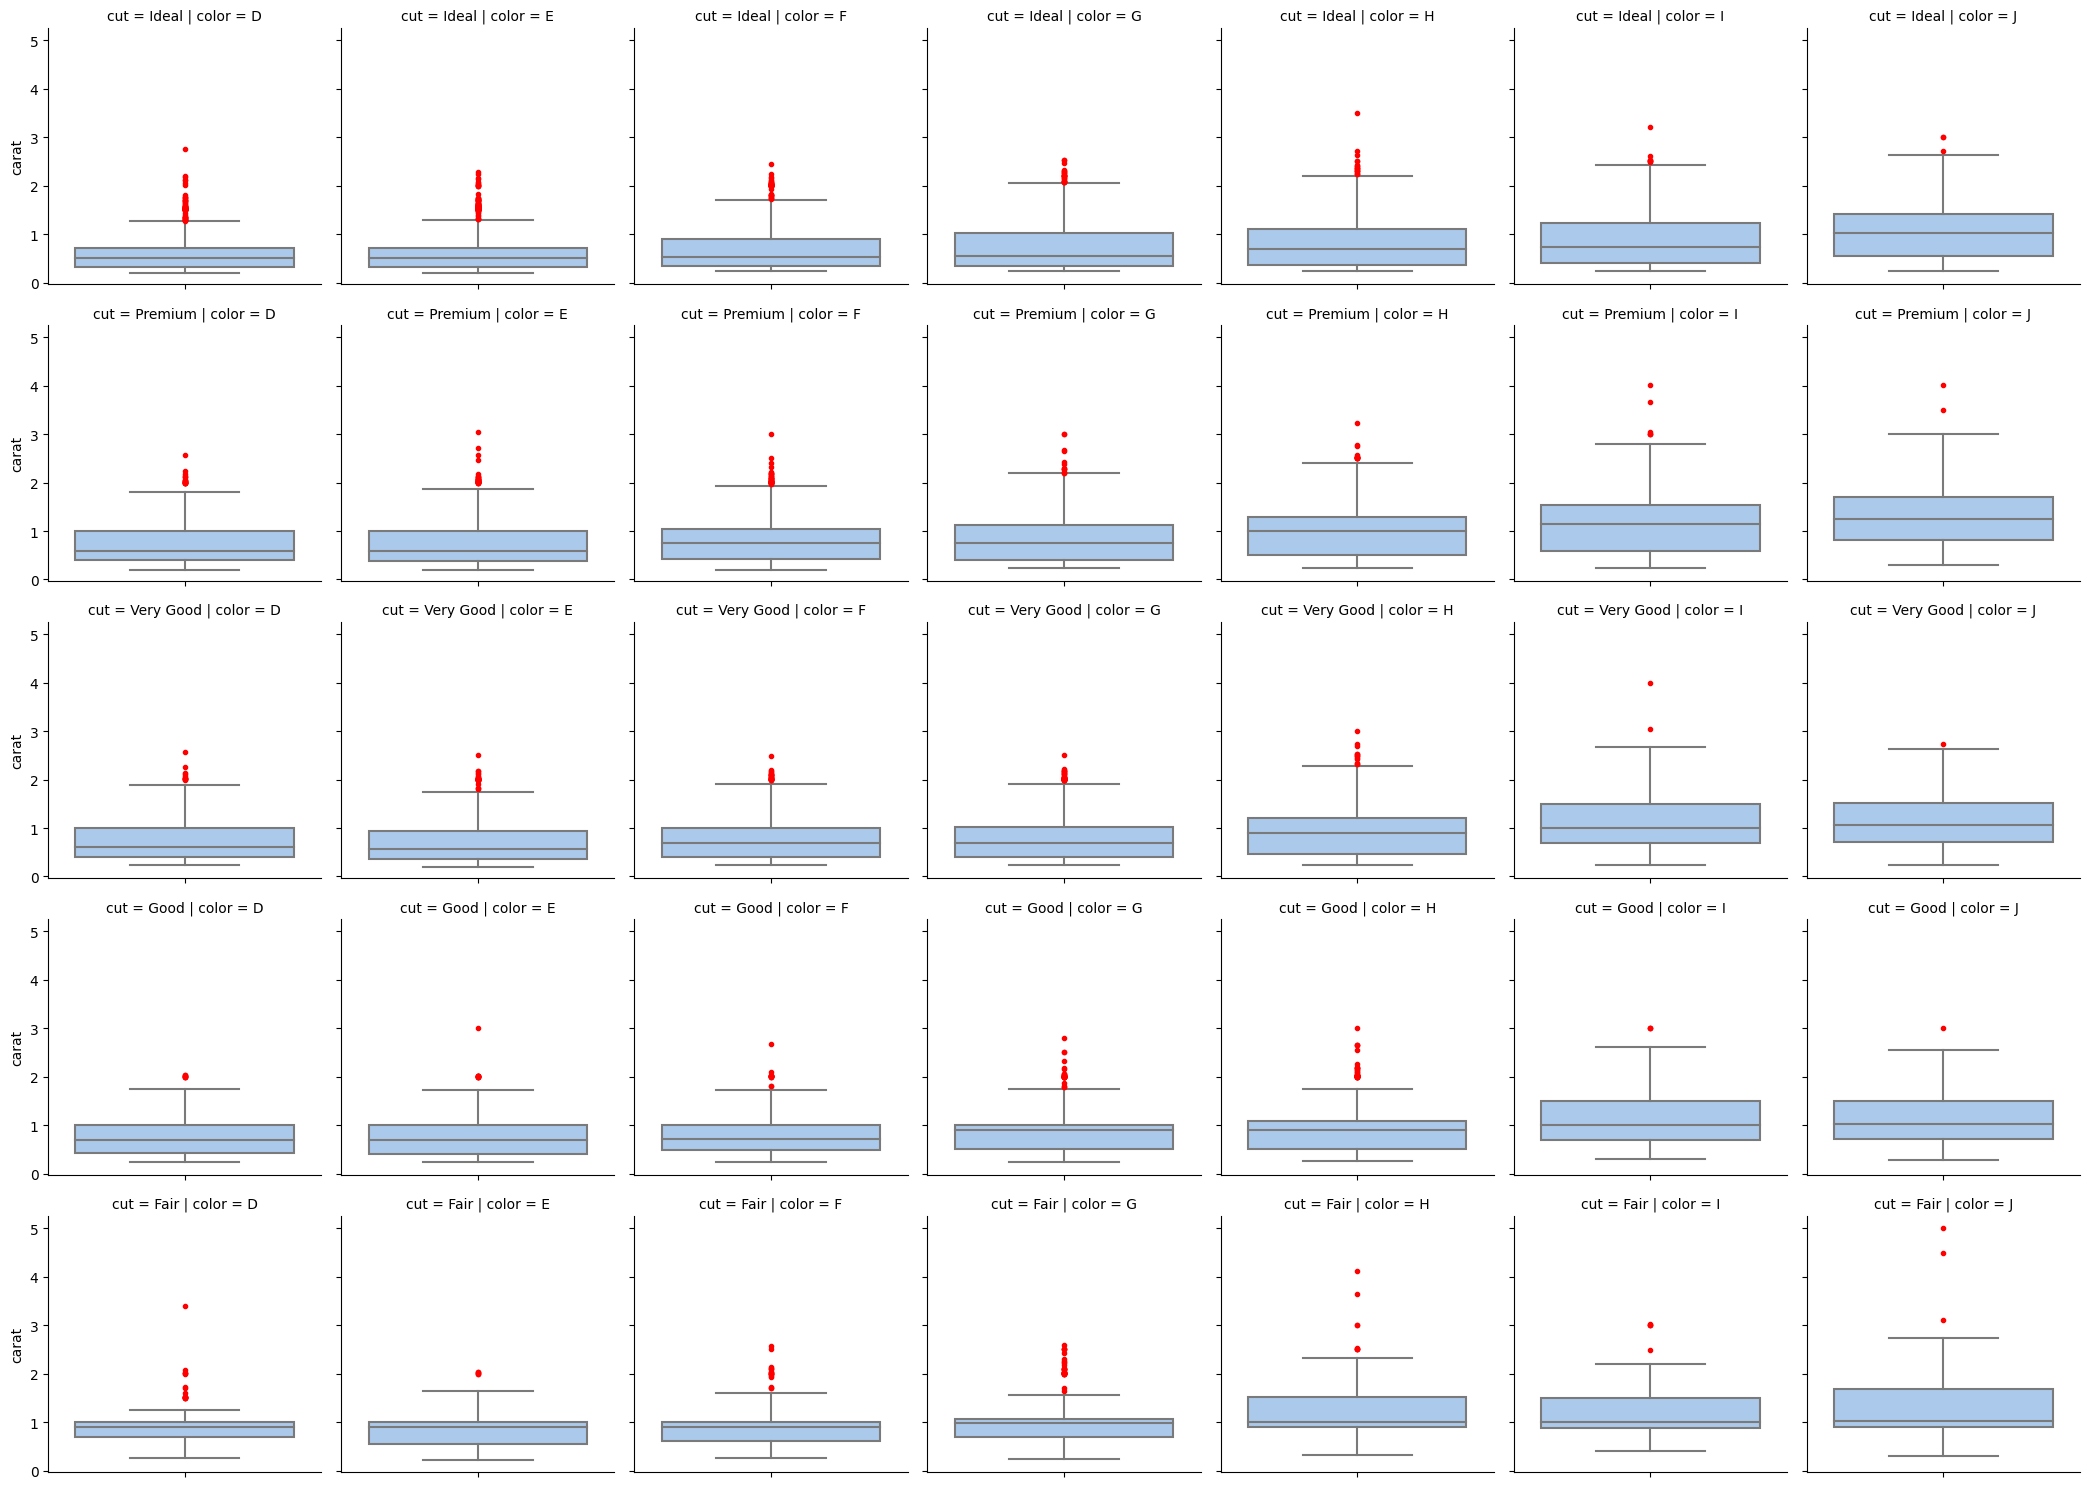

In [60]:
g = sns.FacetGrid(diamonds, row = "cut", col = "color")
g.map_dataframe(sns.boxplot, 
                y = "carat",
                flierprops = flierprops)

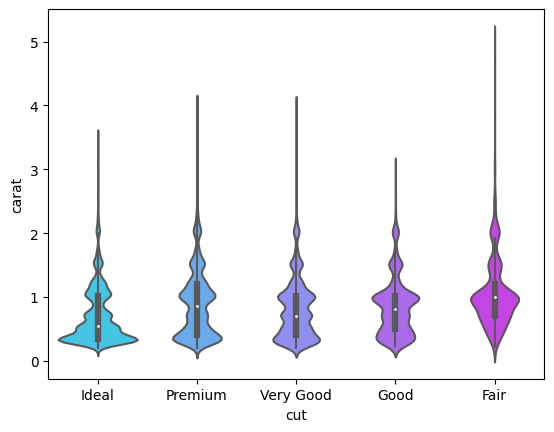

In [57]:
# (3) 범주별 바이올린
# seaborn.violinplot(data = , y = "수치형데이터", x = "범주형데이터")
# plt.show()

sns.violinplot(data = diamonds, y = "carat", x = "cut",
            palette = "cool")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


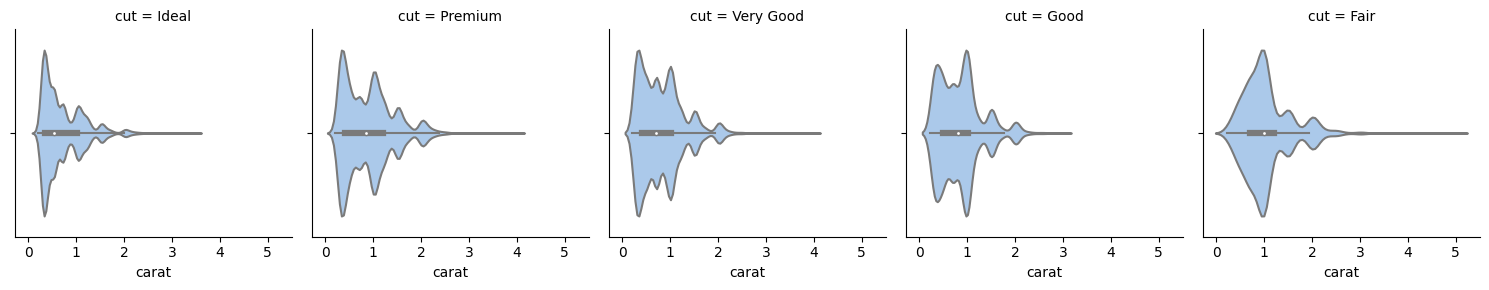

In [62]:
g = sns.FacetGrid(diamonds, col = "cut")
g.map(sns.violinplot, "carat")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


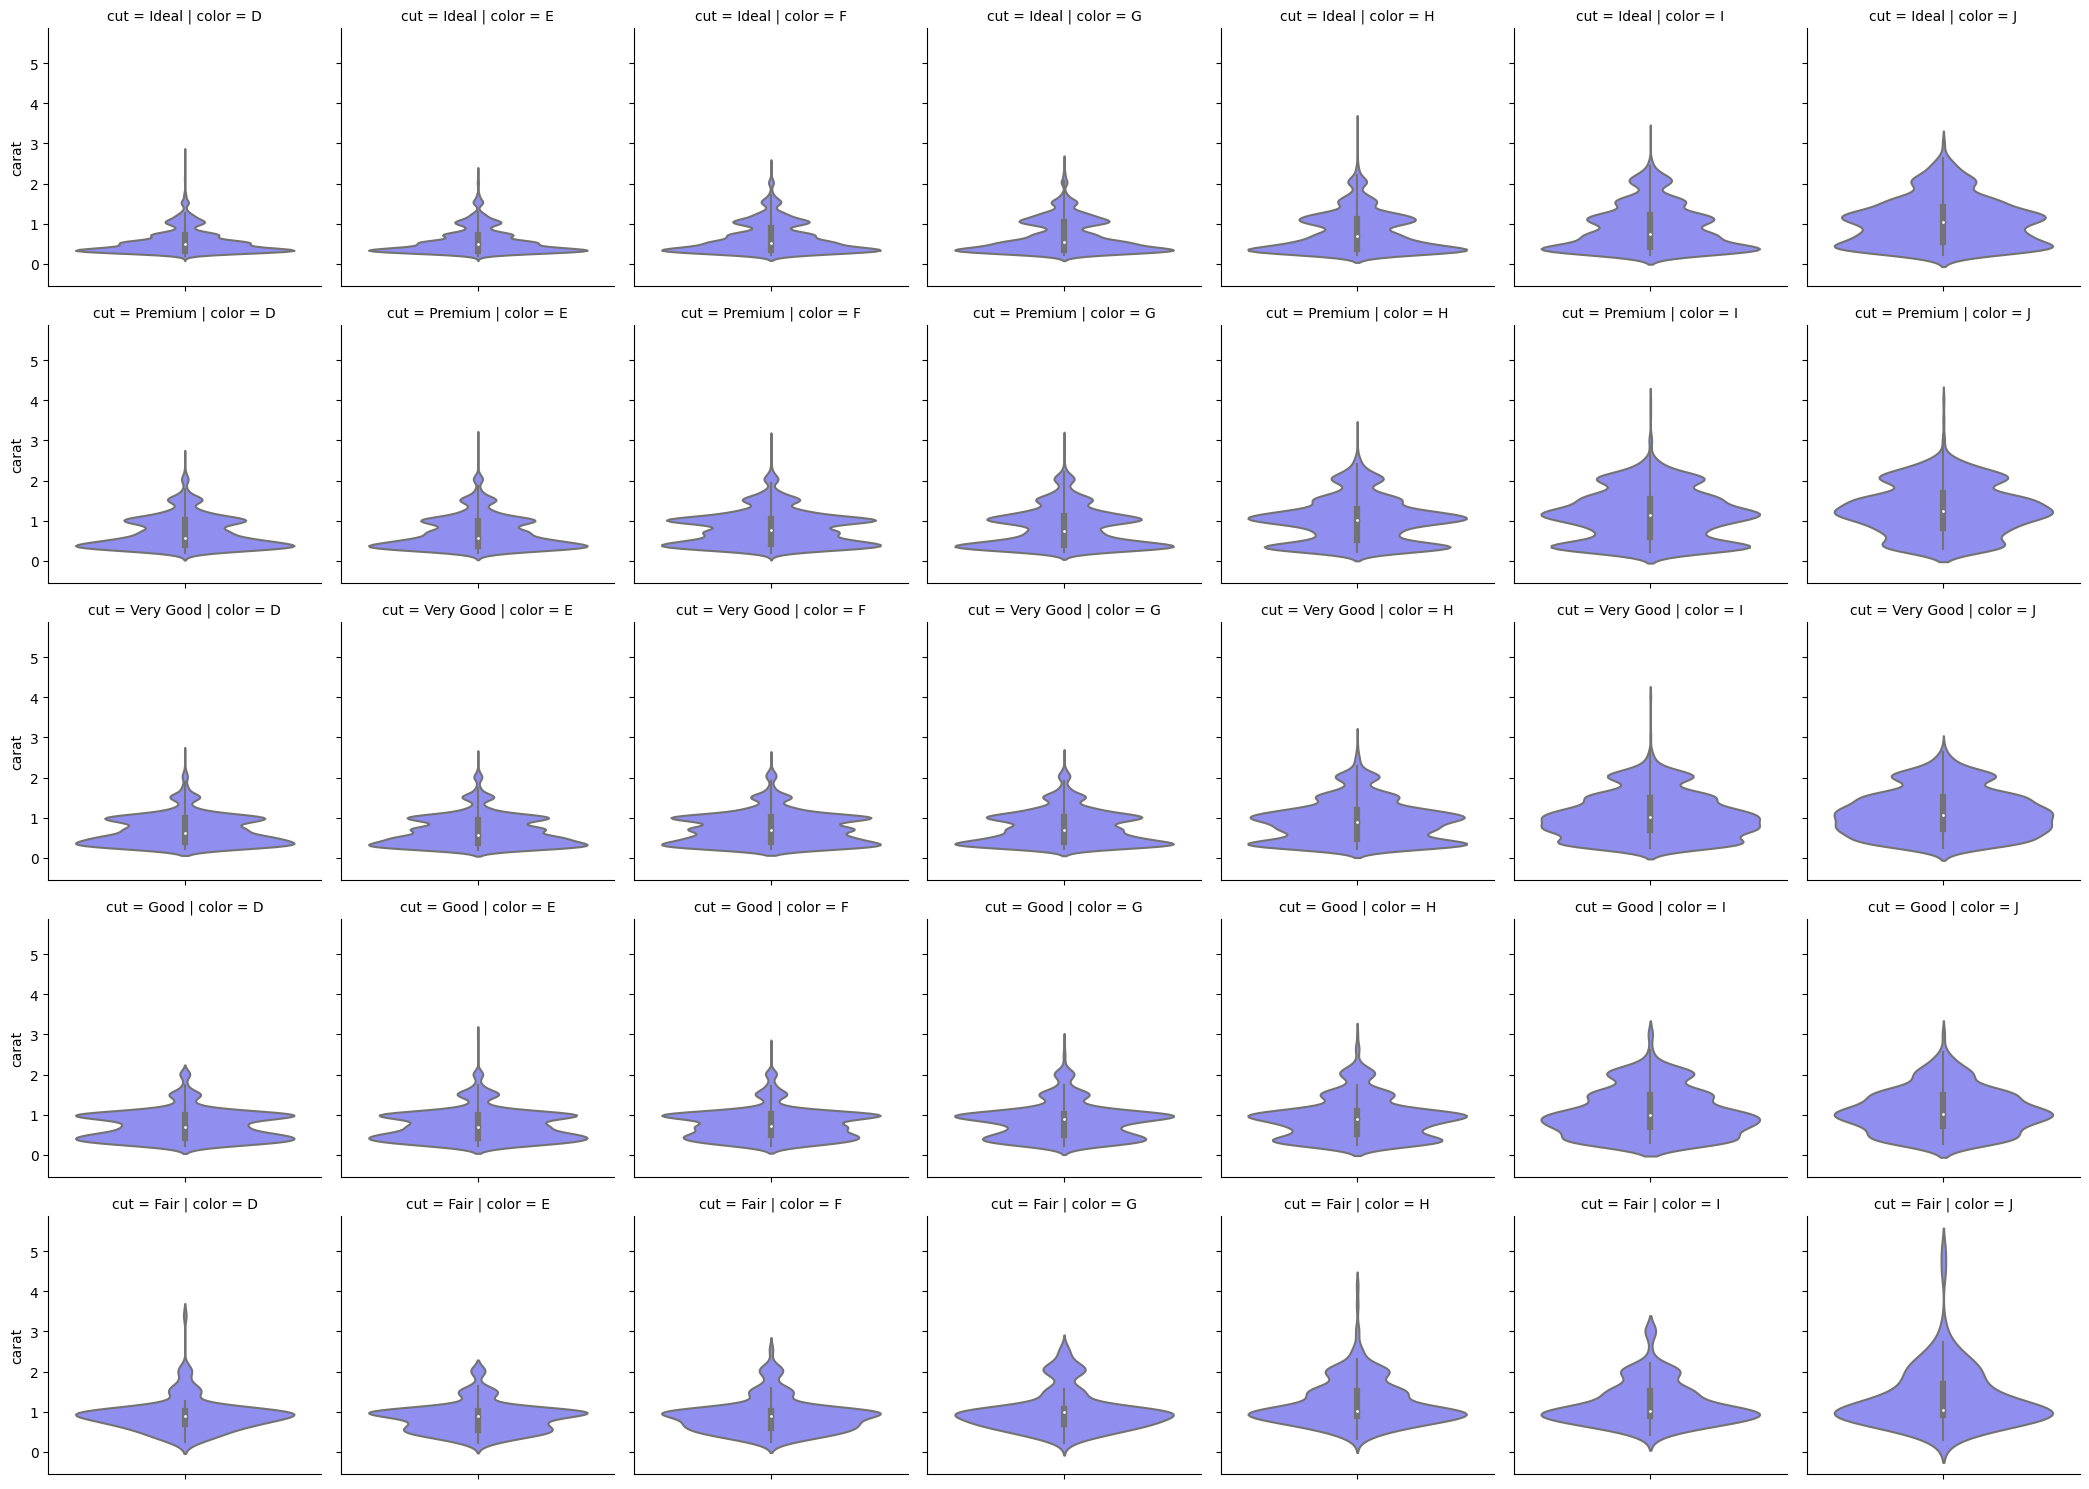

In [64]:
g = sns.FacetGrid(diamonds, row = "cut", col = "color")
g.map_dataframe(sns.violinplot, 
                y = "carat",
                palette = "cool")
plt.show()

In [67]:
# 4.2 범주별 기술통계량 
# data.groupby("범주형데이터").수치형데이터.기술통계량함수()

 #범주별 평균
diamonds.groupby(["cut"]).carat.mean()

cut
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Good         0.849185
Fair         1.046137
Name: carat, dtype: float64

In [68]:
 #범주별 표준편차
diamonds.groupby(["cut"]).carat.std()

cut
Ideal        0.432876
Premium      0.515262
Very Good    0.459435
Good         0.454054
Fair         0.516404
Name: carat, dtype: float64

In [69]:
 #범주별 기술통계량
diamonds.groupby(["cut"]).carat.describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Ideal,21551.0,0.702837,0.432876,0.20,0.35,0.54,1.01,3.50
Premium,13791.0,0.891955,0.515262,0.20,0.41,0.86,1.20,4.01
Very Good,12082.0,0.806381,0.459435,0.20,0.41,0.71,1.02,4.00
Good,4906.0,0.849185,0.454054,0.23,0.50,0.82,1.01,3.01
Fair,1610.0,1.046137,0.516404,0.22,0.70,1.00,1.20,5.01


In [70]:
# 범주별 다름을 비교 : CV(Coefficient of Variation) = 변동계수
# 표준편차/평균

diamonds.groupby(["cut"]).carat.std() / diamonds.groupby(["cut"]).carat.mean()

cut
Ideal        0.615899
Premium      0.577677
Very Good    0.569749
Good         0.534695
Fair         0.493630
Name: carat, dtype: float64

In [71]:
# CV 가장 크면 해당 범주가 가장 data가 다르다고 해석
# Ideal(0.62) > Premium(0.58) > Very Good(0.57) > Good(0.53) > Fair(0.49)

In [72]:
# 범주형 데이터 : 2개 : cut, color 
diamonds.groupby(["cut", "color"]).carat.describe()

count      mean       std   min     25%    50%     75%   max
cut       color                                                               
Ideal     D      2834.0  0.565766  0.299350  0.20  0.3300  0.500  0.7100  2.75
          E      3903.0  0.578401  0.312541  0.20  0.3300  0.500  0.7200  2.28
          F      3826.0  0.655829  0.374525  0.23  0.3500  0.530  0.9000  2.45
          G      4884.0  0.700715  0.410618  0.23  0.3400  0.540  1.0300  2.54
          H      3115.0  0.799525  0.486874  0.23  0.3600  0.700  1.1100  3.50
          I      2093.0  0.913029  0.553728  0.23  0.4100  0.740  1.2200  3.22
          J       896.0  1.063594  0.582100  0.23  0.5400  1.030  1.4100  3.01
Premium   D      1603.0  0.721547  0.397464  0.20  0.4000  0.580  1.0100  2.57
          E      2337.0  0.717745  0.409785  0.20  0.3800  0.580  1.0000  3.05
          F      2331.0  0.827036  0.420196  0.20  0.4300  0.760  1.0400  3.01
          G      2924.0  0.841488  0.479534  0.23  0.4000  0.755  1.1200  3.01
          H      2360.0  1.016449  0.544078  0.23  0.5100  1.010  1.3000  3.24
          I      1428.0  1.144937  0.613604  0.23  0.5900  1.140  1.5400  4.01
          J       808.0  1.293094  0.613709  0.30  0.8100  1.250  1.7000  4.01
Very Good D      1513.0  0.696424  0.369229  0.23  0.4000  0.610  1.0000  2.58
          E      2400.0  0.676317  0.377914  0.20  0.3700  0.570  0.9400  2.51
          F      2164.0  0.740961  0.388883  0.23  0.4000  0.700  1.0100  2.48
          G      2299.0  0.766799  0.418016  0.23  0.4000  0.700  1.0200  2.52
          H      1824.0  0.915948  0.502947  0.23  0.4675  0.900  1.2000  3.00
          I      1204.0  1.046952  0.551984  0.24  0.7000  1.005  1.5000  4.00
          J       678.0  1.133215  0.555920  0.24  0.7100  1.060  1.5100  2.74
Good      D       662.0  0.744517  0.363117  0.23  0.4200  0.700  1.0000  2.04
          E       933.0  0.745134  0.380890  0.23  0.4100  0.700  1.0000  3.00
          F       909.0  0.775930  0.370014  0.23  0.4900  0.710  1.0100  2.67
          G       871.0  0.850896  0.432718  0.23  0.5000  0.900  1.0100  2.80
          H       702.0  0.914729  0.497716  0.25  0.5100  0.900  1.0900  3.01
          I       522.0  1.057222  0.575637  0.30  0.7000  1.000  1.5000  3.01
          J       307.0  1.099544  0.537125  0.28  0.7100  1.020  1.5000  3.00
Fair      D       163.0  0.920123  0.405419  0.25  0.7000  0.900  1.0100  3.40
          E       224.0  0.856607  0.364585  0.22  0.5525  0.900  1.0100  2.04
          F       312.0  0.904712  0.418890  0.25  0.6000  0.900  1.0100  2.58
          G       314.0  1.023822  0.492724  0.23  0.7000  0.980  1.0675  2.60
          H       303.0  1.219175  0.548239  0.33  0.9000  1.010  1.5100  4.13
          I       175.0  1.198057  0.521978  0.41  0.8850  1.010  1.5050  3.02
          J       119.0  1.341176  0.733971  0.30  0.9050  1.030  1.6850  5.01

In [73]:
# 범주형 데이터 : 3개 : cut, color, clarity 
diamonds.groupby(["cut", "color", "clarity"]).carat.mean()

cut    color  clarity
Ideal  D      IF         0.615714
              VVS1       0.460139
              VVS2       0.544789
              VS1        0.533504
              VS2        0.499293
                           ...   
Fair   J      VS1        1.229375
              VS2        1.032609
              SI1        1.181071
              SI2        1.316667
              I1         1.993478
Name: carat, Length: 280, dtype: float64